In [32]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import math
from scipy import stats
from matplotlib import pyplot as plt

In [33]:
lambda_truth = 4.0

In [34]:
x_line = np.arange(4 * lambda_truth)

#true_model = np.exp(
#    x_line * np.log(lambda_truth) - [math.lgamma(x + 1) for x in x_line] - lambda_truth
#)


true_model = stats.poisson.pmf(
    k=x_line, 
    mu=lambda_truth,
)

print(np.round(true_model, 3))

[0.018 0.073 0.147 0.195 0.195 0.156 0.104 0.06  0.03  0.013 0.005 0.002
 0.001 0.    0.    0.   ]


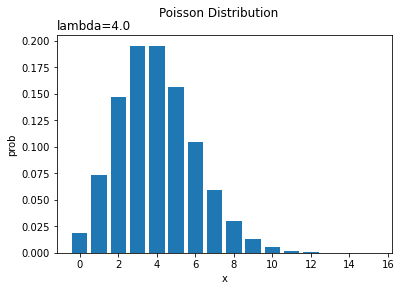

In [35]:
plt.bar(
    x=x_line, 
    height=true_model,
)
plt.xlabel('x')
plt.ylabel('prob')
plt.suptitle('Poisson Distribution')
plt.title(
    f'lambda={lambda_truth}', 
    loc='left',
)
plt.show()

In [36]:
N = 50
x_n = np.random.poisson(lam=lambda_truth, size=N)

print(x_n[:10])

[4 3 5 5 1 2 2 1 6 2]


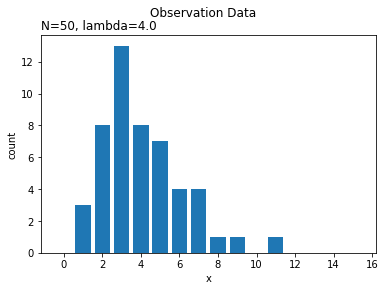

In [37]:
plt.bar(
    x=x_line, 
    height=[np.sum(x_n == x) for x in x_line],
)
plt.xlabel('x')
plt.ylabel('count')
plt.suptitle('Observation Data')
plt.title(
    f'N={N}, lambda={lambda_truth}', 
    loc='left',
)
plt.show()

In [38]:
a = 1
b = 1

In [43]:
lambda_line = np.arange(0, 2 * lambda_truth, 0.001)

#ln_C_gam = a * np.log(b) - math.lgamma(a)
#prior = np.exp(ln_C_gam + (a - 1) * np.log(lambda_line) - b * lambda_line)

prior = stats.gamma.pdf(
    x=lambda_line, 
    a=a, 
    scale=1 / b,
)

print(np.round(prior, 3))

[1.    0.999 0.998 ... 0.    0.    0.   ]


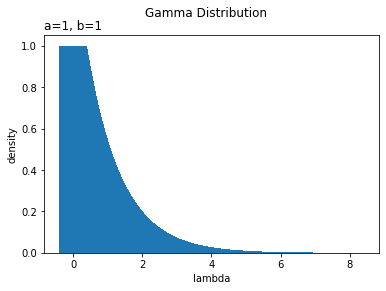

In [44]:
plt.bar(
    x=lambda_line, 
    height=prior,
)
plt.xlabel('lambda')
plt.ylabel('density')
plt.suptitle('Gamma Distribution')
plt.title(
    f'a={a}, b={b}', 
    loc='left',
)
plt.show()

In [45]:
a_hat = np.sum(x_n) + a
b_hat = N + b

print(a_hat)
print(b_hat)

206
51


In [47]:
#ln_C_gam = a_hat * np.log(b_hat) - math.lgamma(a_hat)
#posterior = np.exp(
#    ln_C_gam + (a_hat - 1) * np.log(lambda_line) - b_hat * lambda_line
#)

posterior = stats.gamma.pdf(
    x=lambda_line, 
    a=a_hat, 
    scale=1 / b_hat,
)

print(np.round(posterior, 5))

[0. 0. 0. ... 0. 0. 0.]


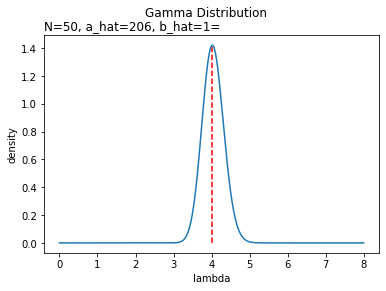

In [48]:
plt.plot(
    lambda_line, 
    posterior,
)
plt.vlines(
    x=lambda_truth, 
    ymin=0, 
    ymax=max(posterior), 
    color='red', 
    linestyle='--',
)
plt.xlabel('lambda')
plt.ylabel('density')
plt.suptitle('Gamma Distribution')
plt.title(
    f'N={N}, a_hat={a_hat}, b_hat={b}=', 
    loc='left',
)
plt.show()

In [49]:
r_hat = a_hat
p_hat = 1 / (b_hat + 1)

print(r_hat)
print(p_hat)

206
0.019230769230769232


In [50]:
#ln_C_NB = np.array(
#    [math.lgamma(x + r_hat) - math.lgamma(x + 1) for x in x_line]
#) - math.lgamma(r_hat)

#predict = np.exp(ln_C_NB + r_hat * np.log(1 - p_hat) + x_line * np.log(p_hat))

predict = stats.nbinom.pmf(
    k=x_line, 
    n=r_hat, 
    p=1 - p_hat,
)

print(np.round(predict, 3))

[0.018 0.073 0.144 0.193 0.193 0.156 0.106 0.062 0.032 0.014 0.006 0.002
 0.001 0.    0.    0.   ]


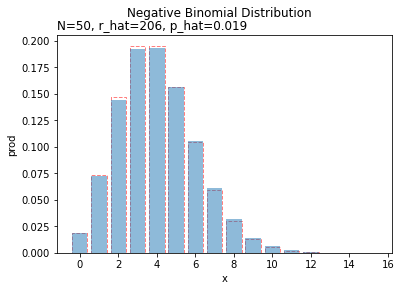

In [51]:
plt.bar(
    x=x_line, 
    height=true_model, 
    label='true', 
    alpha=0.5, 
    color='white', 
    edgecolor='red', 
    linestyle='--',
)
plt.bar(
    x=x_line, 
    height=predict, 
    label='predict', 
    alpha=0.5, 
)
plt.xlabel('x')
plt.ylabel('prod')
plt.suptitle('Negative Binomial Distribution')
plt.title(
    f'N={N}, r_hat={r_hat}, p_hat={np.round(p_hat, 3)}', 
    loc='left',
)
plt.show()